In [1]:
import numpy as np
import pandas as pd 
from PIL import Image # use later to save the word cloud as jpg file
import matplotlib.pyplot as plt # to plot the word cloud

%matplotlib inline

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

# import beautiful soup to scrap the data from Arsenal.com
from bs4 import BeautifulSoup

In [2]:
# use the developer tool to copy the element from Arsenal.com

html = """
<div class="article-body"><p>Played 49, Won 36, Drawn 13, Lost None.</p>
<p>The Arsenal squad which set a new unbeaten league record between May 2003 and October 2004 will live long in the memory and forever in the history books.</p>
<p>The Gunners' historic run actually began amid the ruins of a failed Premiership bid. Arsenal shook off the disappointment of a home defeat against Leeds which handed Manchester United the title to thrash Southampton 6-1 at Highbury on May 7, 2003. No one had an inkling about what would follow.</p>
<blockquote><p>"Arsenal clinched the Premiership with a 2-2 draw at Tottenham. Success rarely tasted sweeter."</p>
</blockquote>
<p>Arsenal started the 2003/04 campaign in style with four straight wins but almost came unstuck at Old Trafford in game No&nbsp;8 of their run. Ruud van Nistelrooy's late penalty cannoned off the crossbar and Arsenal escaped with a 0-0 draw. It was the closest shave of the entire 49-game sequence.</p>
<p>For the most part Arsenal brushed aside all-comers home and away. There were memorable wins at Elland Road, Stamford Bridge and Anfield, plus some great goals along the way. Robert Pires' winner at Liverpool in October 2003 was one of the best, while Thierry Henry produced classic after classic.</p>
<p>Arsène Wenger had built a team to compare with any side in Europe. With Sol Campbell and Kolo Toure at the back, Patrick Vieira and Pires in midfield and Henry partnering Dennis Bergkamp up front, Arsenal had too much steel and too much style for their Premiership rivals.</p>
<p>They had bags of character too. After being dumped out of the FA Cup and Champions League in the space of a few days, Arsenal bounced back from a 2-1 half-time deficit against Liverpool at Highbury in April 2004 to win 4-2 and stay on course for the title.</p>
<p>Later that month Arsenal clinched the Premiership with a 2-2 draw at Tottenham. Success rarely tasted sweeter but there was still history to be made: Arsenal duly avoided defeat against Birmingham, Portsmouth, Fulham and Leicester to complete the first unbeaten league campaign since Preston's in the 19th century.</p>
<p>Nottingham Forest's record of 42 games unbeaten had stood for 26 years. Arsenal matched it on August 22, 2004 but so nearly blew their chance, digging deep to turn a 3-1 deficit into a resounding 5-3 victory.</p>
<p>Three days later Henry, Cesc Fabregas and Jose Antonio Reyes were on target as Arsenal wrote themselves into the history books by beating Blackburn at Highbury. Wenger's team extended their record to 49 games, scoring freely and playing some of the finest football the English game has seen.</p>
<p>The run ended in controversy at Old Trafford as a harshly-awarded penalty spurred Manchester United to a 2-0 win in October 2004. But that defeat did nothing to dim Arsenal's achievement. Wenger's 'Invincibles' will never be forgotten.</p>
<p>
"""

In [3]:
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

<div class="article-body">
 <p>
  Played 49, Won 36, Drawn 13, Lost None.
 </p>
 <p>
  The Arsenal squad which set a new unbeaten league record between May 2003 and October 2004 will live long in the memory and forever in the history books.
 </p>
 <p>
  The Gunners' historic run actually began amid the ruins of a failed Premiership bid. Arsenal shook off the disappointment of a home defeat against Leeds which handed Manchester United the title to thrash Southampton 6-1 at Highbury on May 7, 2003. No one had an inkling about what would follow.
 </p>
 <blockquote>
  <p>
   "Arsenal clinched the Premiership with a 2-2 draw at Tottenham. Success rarely tasted sweeter."
  </p>
 </blockquote>
 <p>
  Arsenal started the 2003/04 campaign in style with four straight wins but almost came unstuck at Old Trafford in game No 8 of their run. Ruud van Nistelrooy's late penalty cannoned off the crossbar and Arsenal escaped with a 0-0 draw. It was the closest shave of the entire 49-game sequence.
 </p>

In [4]:
arsenal = soup.get_text() # save the text as a string variable
type(arsenal)

str

In [5]:
arsenal = arsenal.replace("\n", "") # replace the page break sign
arsenal

'Played 49, Won 36, Drawn 13, Lost None.The Arsenal squad which set a new unbeaten league record between May 2003 and October 2004 will live long in the memory and forever in the history books.The Gunners\' historic run actually began amid the ruins of a failed Premiership bid. Arsenal shook off the disappointment of a home defeat against Leeds which handed Manchester United the title to thrash Southampton 6-1 at Highbury on May 7, 2003. No one had an inkling about what would follow."Arsenal clinched the Premiership with a 2-2 draw at Tottenham. Success rarely tasted sweeter."Arsenal started the 2003/04 campaign in style with four straight wins but almost came unstuck at Old Trafford in game No\xa08 of their run. Ruud van Nistelrooy\'s late penalty cannoned off the crossbar and Arsenal escaped with a 0-0 draw. It was the closest shave of the entire 49-game sequence.For the most part Arsenal brushed aside all-comers home and away. There were memorable wins at Elland Road, Stamford Bridg

In [6]:
# use the stopwords that we imported from word_cloud
# use the function set to remove any redundant stopwords
# techniques learned from the IBM Data Visualization Course

stopwords = set(STOPWORDS)

In [7]:
# instantiate a word cloud object
arsenal_wc = WordCloud(
    background_color='white',
    max_words=len(arsenal),
    stopwords=stopwords
)

# generate the word cloud
arsenal_wc.generate(arsenal)

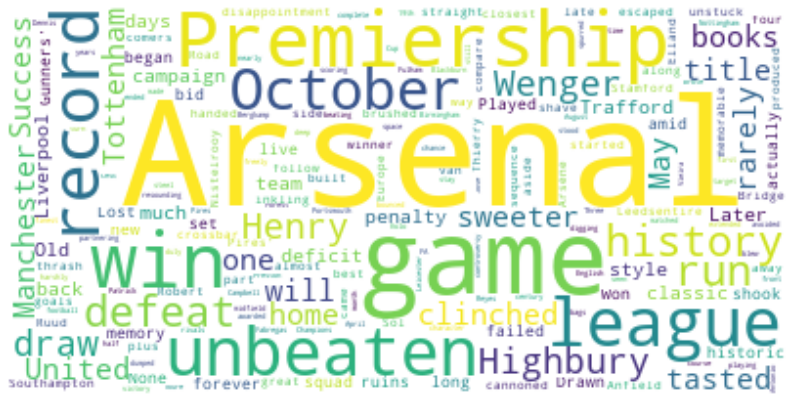

In [8]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the word cloud
plt.imshow(arsenal_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

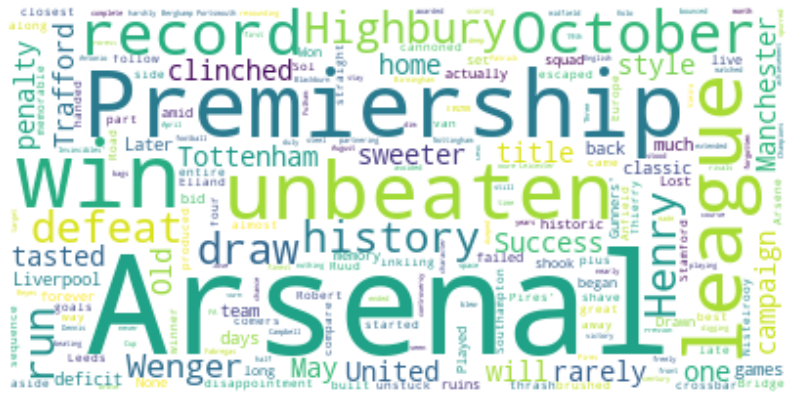

In [9]:
# add the words game to stopwords
stopwords.add("game")
stopwords.add("books")

# re-generate the word cloud
arsenal_wc.generate(arsenal)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(arsenal_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Thoughts for improving the Word Cloud
### - fit the word cloud into the shape of a particular player (e.g. Thierry Henry)
### - find another article that may have more details about the invincilbe season